# Import Packages

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict

# Import Data for analysis

In [8]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Perform EDA

In [24]:
def EDA(df):
    print("Name of Columns in the dataframe: ")
    print(df.columns)
    print("Size of the dataframe: ")
    print(df.shape)
    print("Dataframe Info: ")
    print(df.info())
    print("Sample Data: ")
    print(df.head(5))
    print("Columns with null value: ")
    print(df.isnull().any(axis=0))

In [25]:
EDA(train)

Name of Columns in the dataframe: 
Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')
Size of the dataframe: 
(550068, 12)
Dataframe Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              55

In [26]:
EDA(test)

Name of Columns in the dataframe: 
Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')
Size of the dataframe: 
(233599, 11)
Dataframe Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-nul

# Perform EDA on the train Data (Variable Level):

In [30]:
print(train['Product_ID'].value_counts())
print(len(train['Product_ID'].unique()))

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00350742       1
P00204442       1
P00083542       1
P00143242       1
P00077242       1
Name: Product_ID, Length: 3631, dtype: int64
3631


In [32]:
print(train['Gender'].value_counts(2))

M    0.753105
F    0.246895
Name: Gender, dtype: float64


In [33]:
print(train['Age'].value_counts(2))

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64


In [34]:
print(train['Occupation'].value_counts(2))

4     0.131453
0     0.126599
7     0.107501
1     0.086218
17    0.072796
20    0.061014
12    0.056682
14    0.049647
2     0.048336
16    0.046123
6     0.037005
3     0.032087
10    0.023506
5     0.022137
15    0.022115
11    0.021063
19    0.015382
13    0.014049
18    0.012039
9     0.011437
8     0.002811
Name: Occupation, dtype: float64


In [40]:
print(train['City_Category'].value_counts(2))   

B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64


In [39]:
print(train['Stay_In_Current_City_Years'].value_counts(2))   

1     0.352358
2     0.185137
3     0.173224
4+    0.154028
0     0.135252
Name: Stay_In_Current_City_Years, dtype: float64


In [38]:
print(train['Marital_Status'].value_counts(2))

0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64


In [42]:
print(train['Product_Category_1'].value_counts(2))

8.0     0.170252
14.0    0.146396
2.0     0.130747
16.0    0.114908
15.0    0.100563
5.0     0.069694
4.0     0.068212
6.0     0.043743
11.0    0.037547
17.0    0.035385
13.0    0.027976
9.0     0.015124
12.0    0.014685
10.0    0.008084
3.0     0.007661
18.0    0.007359
7.0     0.001663
Name: Product_Category_2, dtype: float64


In [43]:
print(train['Product_Category_2'].value_counts(2))

8.0     0.170252
14.0    0.146396
2.0     0.130747
16.0    0.114908
15.0    0.100563
5.0     0.069694
4.0     0.068212
6.0     0.043743
11.0    0.037547
17.0    0.035385
13.0    0.027976
9.0     0.015124
12.0    0.014685
10.0    0.008084
3.0     0.007661
18.0    0.007359
7.0     0.001663
Name: Product_Category_2, dtype: float64


In [44]:
print(train['Product_Category_3'].value_counts(2))

16.0    0.195635
15.0    0.167923
14.0    0.110466
17.0    0.100119
5.0     0.099856
8.0     0.075302
9.0     0.069410
12.0    0.055425
13.0    0.032724
6.0     0.029313
18.0    0.027748
4.0     0.011240
11.0    0.010820
10.0    0.010346
3.0     0.003675
Name: Product_Category_3, dtype: float64


In [45]:
train.groupby(['Product_Category_1','Product_Category_2','Product_Category_3']).size() 

Product_Category_1  Product_Category_2  Product_Category_3
1                   2.0                 3.0                    613
                                        4.0                    524
                                        5.0                   7982
                                        6.0                   1924
                                        8.0                   2800
                                                              ... 
11                  15.0                16.0                   850
12                  14.0                17.0                   159
13                  14.0                16.0                   519
                    15.0                16.0                   537
15                  16.0                17.0                   151
Length: 137, dtype: int64

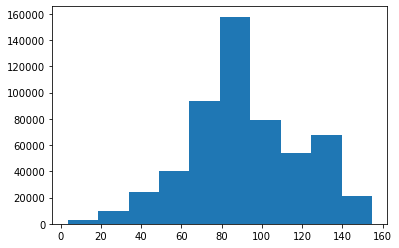

In [53]:
plt.hist(np.sqrt(train['Purchase']))
plt.show()

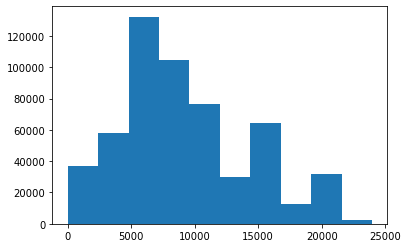

In [54]:
plt.hist(train['Purchase'])
plt.show()

Perform Baseline Linear Regression Model

In [81]:
categorical_columns = ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1']
for i in categorical_columns:
    train[i] = train[i].astype('category')
    train[i] = train[i].cat.codes
    train[i].fillna(train[i].mode(),inplace=True)
    train[i] = train[i].astype('category')

In [82]:
X = train.drop(['Purchase','User_ID','Product_ID','Product_Category_2','Product_Category_3'], axis=1)
y = train['Purchase']

In [83]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Gender                      550068 non-null  category
 1   Age                         550068 non-null  category
 2   Occupation                  550068 non-null  category
 3   City_Category               550068 non-null  category
 4   Stay_In_Current_City_Years  550068 non-null  category
 5   Marital_Status              550068 non-null  category
 6   Product_Category_1          550068 non-null  category
dtypes: category(7)
memory usage: 3.7 MB


# Perform Linear Regression and Decision Tree to understand the Baseline

In [84]:
lr = LinearRegression()
mdl = lr.fit(X,y)

In [85]:
y_pred = lr.predict(X)

In [80]:
print("R2_Score: ",r2_score(y,y_pred))
print("RMSE: ",mean_squared_error(y,y_pred))

R2_Score:  0.1244132849776095
RMSE:  22092051.06013008


In [87]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
y_pred = clf.predict(X)

In [88]:
print("R2_Score: ",r2_score(y,y_pred))
print("RMSE: ",mean_squared_error(y,y_pred))

R2_Score:  0.6932070730646582
RMSE:  7740735.315483867
